In [19]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Determine the F1-score for spam detection

In [2]:
# Precision = TP/ TP + FP
Precision = 1380 / (1380 + 20)
# Recall = TP / TP + FN
Recall = 1380 / (1380 + 255)
f1_score = (Precision * Recall)/ (Precision + Recall)
f1_score * 2

0.9093904448105438

In [17]:
digits = load_digits()
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Class with the highest accuracy: 1
Highest accuracy value: 1.0
Accuracy for class 0: 0.9697
Accuracy for class 1: 1.0000
Accuracy for class 2: 1.0000
Accuracy for class 3: 0.9412
Accuracy for class 4: 1.0000
Accuracy for class 5: 0.9574
Accuracy for class 6: 0.9714
Accuracy for class 7: 0.9706
Accuracy for class 8: 0.9667
Accuracy for class 9: 0.9500


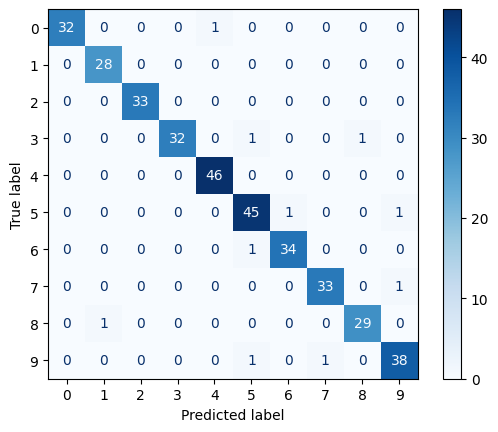

In [28]:
# Load the dataset (e.g., the MNIST-like digits dataset from sklearn)
digits = load_digits()
X = digits.data
y = digits.target
# X
digits
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# # Predict the labels on the test set
y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy on the test set: {accuracy:.4f}")
# # Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm
# # Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
# plt.show()
accuracies = cm.diagonal() / cm.sum(axis=1)

# # Find the class with the highest accuracy
highest_accuracy_class = np.argmax(accuracies)
highest_accuracy_value = accuracies[highest_accuracy_class]

print("Class with the highest accuracy:", highest_accuracy_class)
print("Highest accuracy value:", highest_accuracy_value)

# # Optionally, print all accuracies
for i, acc in enumerate(accuracies):
    print(f"Accuracy for class {i}: {acc:.4f}")

In [30]:
df = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Converting TotalCharges column to numeric values

In [31]:
# errors='coerce' parameter in pd.to_numeric() which will convert invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# Handling Missing values Nans
df.fillna(0, inplace= True)
df['TotalCharges'].isnull().sum()

np.int64(0)

#### Converting ```Churn```  values into binary form 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [33]:
dict_churn = {"Yes" : 1, "No" : 0}
df['Churn'].replace(dict_churn, inplace= True)

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_17412\2984683376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(dict_churn, inplace= True)
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_17412\2984683376.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace(dict_

In [34]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


#### Training the dataset

In [42]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[categorical]
y = df[numerical]
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output= False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns= numerical, index = y_train.index)
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns = numerical, index = y_test.index )
x_train_encoded = encoder.fit_transform(X_train)
x_test_encoded = encoder.transform(X_test)
x_train_column = encoder.get_feature_names_out(categorical)
x_test_column = encoder.get_feature_names_out(categorical)
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=x_train_column, index = X_train.index)
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns= x_test_column, index = X_test.index)
y_train

,tenure,MonthlyCharges,TotalCharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


##### Combining ```Scaled Numerical``` and ```One Hot Encoded``` categorical features into train and test set dataframes.

In [40]:
train_df = pd.concat([x_train_encoded_df, y_train_scaled_df], axis= 1)
test_df = pd.concat([x_test_encoded_df, y_test_scaled_df], axis= 1)
train_df

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
1814,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.825884,-1.497530,-0.890947
5946,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.395961,0.302996,0.389693
3881,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.577078,0.012320,1.060945
2389,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.577078,0.686687,1.775397
3676,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.092777,0.186726,-0.102671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.948068,1.186648,-0.599602
5192,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.129068,-1.489225,-0.479886
3980,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.174233,1.359393,0.309802
235,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.233166,-0.344795,-0.954599


#### To train a random forest and extra trees classifier, and use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model.

In [46]:
rm_clf = RandomForestClassifier(random_state= 1)
tr_clf = ExtraTreesClassifier(random_state= 1)
xgb = XGBClassifier(random_state = 1)
gbm_light = LGBMClassifier(random_state= 1)
rm_clf.fit(x_train_encoded_df, y_train)
tr_clf.fit(x_train_encoded_df, y_train)
xgb.fit(x_train_encoded_df, y_train)
gbm_light.fit(x_train_encoded_df, y_train)
# y_pred = rm_clf.predict(x_test_encoded_df)
# y_pred

# print(f"Accuracy: {accuracy_score(y_test_scaled_df.values, y_pred)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785


LGBMClassifier(random_state=1)

In [54]:
from sklearn.preprocessing import LabelEncoder

# Derive binary target variable
# df['Churn'] = df['tenure'].apply(lambda x: 1 if x <= 12 else 0)  # Example threshold of 12 months

# Select features and target variable
X = df[categorical]
y = df['Churn']

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
# Initialize LabelEncoder for target classes
label_encoder = LabelEncoder()
y_train_classes = label_encoder.fit_transform(y_train)
y_test_classes = label_encoder.transform(y_test)
rm_clf = RandomForestClassifier(random_state= 1)
tr_clf = ExtraTreesClassifier(random_state= 1)
xgb = XGBClassifier(random_state = 1)
tree = tr_clf.fit(X_train_encoded, y_train)
rm_clf.fit(X_train_encoded, y_train)
y_pred = tr_clf.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees classifier: {rf_accuracy}")

Extra Trees classifier: 0.7565649396735273


In [47]:
# Predictions
# rf_train = rm_clf.fit(X_train_encoded, y_train)
# tr_train = tr_clf.fit()
rf_predictions = rm_clf.predict(x_test_encoded_df)
extra_trees_predictions = tr_clf.predict(x_test_encoded_df)
xgb_predictions = xgb.predict(x_test_encoded_df)
lgbm_predictions = gbm_light.predict(x_test_encoded_df)

# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_predictions)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Extra Trees Classifier Accuracy:", extra_trees_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("LightGBM Classifier Accuracy:", lgbm_accuracy)

Random Forest Classifier Accuracy: 0.7622427253371186
Extra Trees Classifier Accuracy: 0.7565649396735273
XGBoost Classifier Accuracy: 0.765791341376863
LightGBM Classifier Accuracy: 0.7885024840312278


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Extra Trees Classifier
etc = ExtraTreesClassifier(random_state=1)

# Define the parameter grid
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=etc,
                                   param_distributions=hyperparameter_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=1)

# Fit the RandomizedSearchCV
random_search.fit(X_train_encoded, y_train)  # Replace X_train and y_train with your training data

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
